In [30]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('merged_data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Unnamed: 0.1'], axis = 1)
df.head()

,Game_date,Games_played_to_date,BA,PA,Name,ISO,SLG,BABIP,BIP,OBP,...,strike_percentage,pitches_per_appearance_avg,ground_ball_percentage,fly_ball_percentage,strikeout_percentage,next_game_team1,next_game_team2,hitter_R%,hitter_L%,next_game_hit_vs_fp
0,2014-03-31,1,0.00000,4,Travis d'Arnaud,0.0,0.00000,0.00000,0.33333,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0
1,2014-03-31,1,0.20000,5,Jayson Werth,0.0,0.20000,0.33333,0.60000,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1
2,2014-03-31,1,0.25000,5,Ian Desmond,0.0,0.25000,0.25000,1.00000,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1
3,2014-03-31,1,0.25000,5,Bryce Harper,0.0,0.25000,0.50000,0.50000,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0
4,2014-03-31,1,0.33333,5,Adam LaRoche,1.0,1.33333,0.00000,1.00000,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1


In [32]:
col = []
for i in df.columns:
    if str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.int64'>" or str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.float64'>" or isinstance(df.at[df[i].first_valid_index(), i], int) or isinstance(df.at[df[i].first_valid_index(), i], float):
        col.append(i)
col

['Games_played_to_date',
 'BA',
 'PA',
 'ISO',
 'SLG',
 'BABIP',
 'BIP',
 'OBP',
 'OPS',
 'LA_avg',
 'LA_median',
 'Walks',
 'next_game_HIT',
 'H_total_next_game',
 'AB_next_game',
 'Walks_next_game',
 'AB_vs_first_pitcher',
 'earliest_inning',
 'first_pitcher_faced_next_game_id',
 'hits_vs_first_pitcher',
 'BA_last_10_games',
 'BA_last_20_games',
 'BA_last_30_games',
 'BABIP_last_10_games',
 'BABIP_last_20_games',
 'BABIP_last_30_games',
 'BIP_last_10_games',
 'BIP_last_20_games',
 'BIP_last_30_games',
 'ISO_last_10_games',
 'ISO_last_20_games',
 'ISO_last_30_games',
 'LAmed_last_10_games',
 'LAmed_last_20_games',
 'LAmed_last_30_games',
 'OBP_last_10_games',
 'OBP_last_20_games',
 'OBP_last_30_games',
 'OPS_last_10_games',
 'OPS_last_20_games',
 'OPS_last_30_games',
 'PA_last_10_games',
 'PA_last_20_games',
 'PA_last_30_games',
 'SLG_last_10_games',
 'SLG_last_20_games',
 'SLG_last_30_games',
 'Walks_last_10_games',
 'Walks_last_20_games',
 'Walks_last_30_games',
 'mlbam_code',
 'Fla

In [33]:
len(col)

227

In [34]:
for i in df.columns:
    if not (str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.int64'>" or str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.float64'>" or isinstance(df.at[df[i].first_valid_index(), i], int) or isinstance(df.at[df[i].first_valid_index(), i], float)):
        print (i)

Game_date
Name
next_game_date
HomeTeam
AwayTeam
Date_x
Team 1
Team 2
Venue
Weather Type
Wind Direction
Year_x
PARK NAME
PARKID
LEAGUE
CITY
Foul
Pitcher_Name
Pitcher_ID
Date_y
Team
At
Opponent
Result
Innings
Decision
Entered
Exited
name_last
name_first
key_retro
key_bbref
next_game_team1
next_game_team2


In [35]:
col.append('Weather Type')
col.append('Wind Direction')
col.append('PARKID')

In [36]:
train = df[col]
train = train.drop(['next_game_HIT'], axis = 1)
train = train.drop(['H_total_next_game'], axis = 1)
train = train.drop(['AB_next_game'], axis = 1)
train = train.drop(['Walks_next_game'], axis = 1)
train = train.drop(['next_game_hit_vs_fp'], axis = 1)
train = train.drop(['hits_vs_first_pitcher'], axis = 1)
train = train.drop(['Team 1 Score'], axis = 1)
train = train.drop(['Team 2 Score'], axis = 1)
train = train.drop(['Game_Score'], axis = 1)
train = train.drop(['Inherited_Score'], axis = 1)
train = train.drop(['key_fangraphs'], axis = 1)
train = train.drop(['first_pitcher_faced_next_game_id'], axis = 1)
train = train.drop(['YEAR'], axis = 1)
train = train.drop(['nYear'], axis = 1)
train = train.drop(['Year_y'], axis = 1)
train = train.drop(['key_mlbam'], axis = 1)
train = train.drop(['mlb_played_first'], axis = 1)
train = train.drop(['mlb_played_last'], axis = 1)
train = train.drop(['Game_Number'], axis = 1)
train = train.drop(['Team_Game_Number'], axis = 1)
test = df['next_game_HIT']
train.head()

,Games_played_to_date,BA,PA,ISO,SLG,BABIP,BIP,OBP,OPS,LA_avg,...,strike_percentage,pitches_per_appearance_avg,ground_ball_percentage,fly_ball_percentage,strikeout_percentage,hitter_R%,hitter_L%,Weather Type,Wind Direction,PARKID
0,1,0.00000,4,0.0,0.00000,0.00000,0.33333,0.25,0.25000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,Partly Cloudy,Out To LF,NYC20
1,1,0.20000,5,0.0,0.20000,0.33333,0.60000,0.20,0.40000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,Partly Cloudy,Out To LF,NYC20
2,1,0.25000,5,0.0,0.25000,0.25000,1.00000,0.20,0.45000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,Partly Cloudy,Out To LF,NYC20
3,1,0.25000,5,0.0,0.25000,0.50000,0.50000,0.40,0.65000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,Partly Cloudy,Out To LF,NYC20
4,1,0.33333,5,1.0,1.33333,0.00000,1.00000,0.60,1.93333,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,Partly Cloudy,Out To LF,NYC20


In [37]:
for i in train.columns:    
    if (train.shape[0] - train[i].count()) / train.shape[0] > .3:
        print (i)
        train = train.drop([i], axis = 1)

BA_last_30_games
BABIP_last_30_games
BIP_last_30_games
ISO_last_30_games
LAmed_last_20_games
LAmed_last_30_games
OBP_last_30_games
OPS_last_30_games
PA_last_30_games
SLG_last_30_games
Walks_last_30_games
EP_percentage_hits
FA_percentage_hits
FO_percentage_hits
FS_percentage_hits
KC_percentage_hits
KN_percentage_hits
SC_percentage_hits
pHitsByZone11
pHitsByZone12
pHitsByZone3
Inherited_Runners
hip_last_ten
wip_last_ten


In [38]:
for i in train.columns:
    if len(train[i].unique()) > 2 and i != 'Weather Type' and i != 'Wind Direction' and i != 'PARKID':
        train[i] = train[i].fillna(train[i].median())
    else:
        train[i] = train[i].fillna(train[i].mode()[0])

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
train['Weather Type'] = label_encoder.fit_transform(train['Weather Type']).astype('float64')
train['Wind Direction'] = label_encoder.fit_transform(train['Wind Direction']).astype('float64')
train['PARKID'] = label_encoder.fit_transform(train['PARKID']).astype('float64')

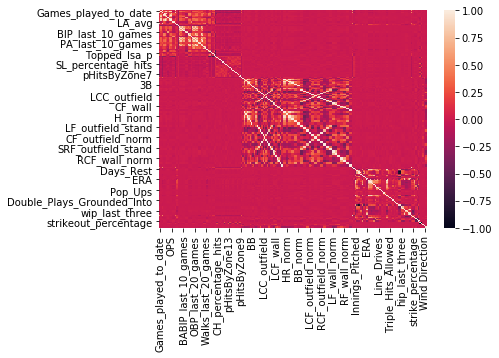

In [40]:
corr = train.corr()
sns.heatmap(corr)

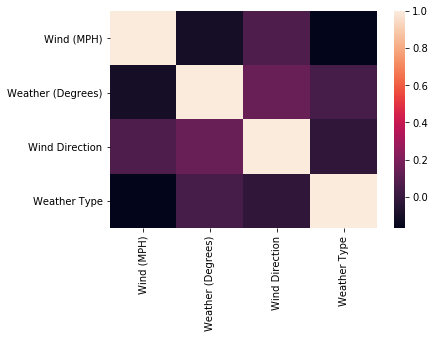

In [41]:
weather = train[['Wind (MPH)', 'Weather (Degrees)', 'Wind Direction', 'Weather Type']].corr()
sns.heatmap(weather)

In [42]:
#https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [43]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [44]:
def get_accuracy(predictions):
    acc = []
    predictions = [float(i) for i in predictions]
    comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
    comparison = comparison.reset_index()
    comparison = comparison.drop(['index'], axis=1)
    correct = 0
    for i in range(len(comparison)):
        if comparison.at[i, 'Real'] == comparison.at[i, 'Predictions']:
            correct += 1
    acc.append(correct / len(comparison))
    false = comparison[comparison['Real'] != comparison['Predictions']]
    false = false.reset_index()
    false = false.drop(['index'], axis = 1)
    falsePositive = 0
    if len(false) == 0:
        acc.append(falsePositive)
    else:
        for i in range(len(false)):
            if false.at[i, 'Real'] == 0:
                falsePositive += 1
        acc.append(falsePositive / len(false))
    return acc

In [45]:
from sklearn.model_selection import train_test_split
x, y = pd.DataFrame(train), pd.DataFrame(test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())
predictions = logreg.predict(x_test)
acc = get_accuracy(predictions)
print ('Accuracy: ' + str(acc[0]) + ' False Positive: ' + str(acc[1]))

Accuracy: 0.6475694444444444 False Positive: 1.0


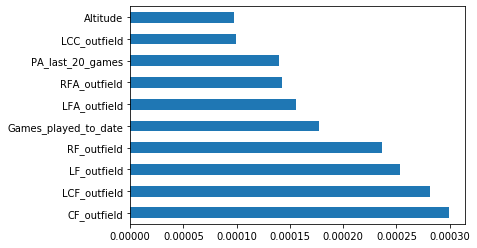

In [47]:
feat_importances = pd.Series(logreg.coef_[0], index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train.values.ravel())
predictions = clf.predict(x_test)
acc = get_accuracy(predictions)
print ('Accuracy: ' + str(acc[0]) + ' False Positive: ' + str(acc[1]))

Accuracy: 0.6519485903814262 False Positive: 0.9067153067301965


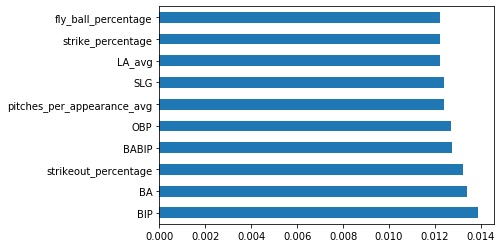

In [49]:
feat_importances = pd.Series(clf.feature_importances_, index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [50]:
#rbf svc too slow to train
from sklearn.svm import LinearSVC
linsvc=LinearSVC()
linsvc.fit(x_train, y_train.values.ravel())
predictions = linsvc.predict(x_test)
acc = get_accuracy(predictions)
print ('Accuracy: ' + str(acc[0]) + ' False Positive: ' + str(acc[1]))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.6475694444444444 False Positive: 1.0


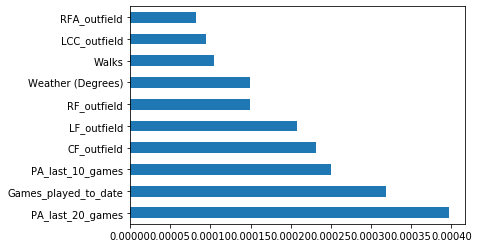

In [51]:
feat_importances = pd.Series(linsvc.coef_[0], index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')